In [201]:
#import libraries
import random as rd
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
import cartopy.io.shapereader as shpreader
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [156]:
#Read mean created using nco from Linux
#data0 = xr.open_dataset(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\mean.nc', decode_times=False)

#Read output from psims
data00 = xr.open_dataset(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\outputs\new\runFinal\output.nc4', decode_times=False) 

# replace all values equal to -99 with np.nan
#data_mean = data0.where(data0['biomass'] != -99.)
dataPre4 = data00.where(data00['biomass'] != -99.)
dataPre3 = dataPre4.where(dataPre4['FloweringDAS'] != -99.)
dataPre2 = dataPre3.where(dataPre3['MaxLAI'] != -99.)

# Extract single lat/long combination for a particular variable
data2 = dataPre2.where(dataPre2.biomass != dataPre2.biomass[8,0:,0:,73,0:], drop=True)

#Conver multidimendional frame to 2D frame
data2pd = data2.to_dataframe()
dfc = data2pd[data2pd.biomass != 0]
dfc.reset_index(level=[0,1,2,3,4], inplace=True)

#Change name of column
dfc.rename(columns={'scen_new':'cultivar'}, inplace=True)
df = dfc.dropna()
df0 = df.where(df['biomass'] != 0)
X=df0.groupby(['lat','lon'])[['RadiationIn','TempIn','RainIn','biomass']].mean()

C:\Users\uqjojeda\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [157]:
X

RadiationIn     TempIn      RainIn       biomass
lat   lon                                                     
26.25 -99.75  2117.585693  28.994913  187.439774  12496.622070
      -99.25  2013.013794  30.333187  156.254028  12919.647461
      -98.75  2169.454590  30.638323  165.867279  12681.167969
      -98.25  2334.347412  29.742979  168.077377  11264.953125
      -97.75  2170.090820  29.391766  193.118683  11686.495117
...                   ...        ...         ...           ...
45.75 -98.25  2646.646484  19.690083  300.809998  13708.612305
      -97.75  2607.606201  19.665939  308.555511  13749.832031
      -97.25  2649.182129  18.824791  320.891937  13562.751953
      -96.75  2604.484131  19.721216  327.968933  13953.210938
      -96.25  2616.099854  19.543634  352.180634  13763.797852

[1756 rows x 4 columns]

In [158]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=200) #algorithm='elkan'

y = kmeans.fit_predict(X[['RadiationIn','TempIn','RainIn']])

X['env'] = y

#print(X)

In [159]:
X

RadiationIn     TempIn      RainIn       biomass  env
lat   lon                                                          
26.25 -99.75  2117.585693  28.994913  187.439774  12496.622070    0
      -99.25  2013.013794  30.333187  156.254028  12919.647461    0
      -98.75  2169.454590  30.638323  165.867279  12681.167969    0
      -98.25  2334.347412  29.742979  168.077377  11264.953125    3
      -97.75  2170.090820  29.391766  193.118683  11686.495117    0
...                   ...        ...         ...           ...  ...
45.75 -98.25  2646.646484  19.690083  300.809998  13708.612305    1
      -97.75  2607.606201  19.665939  308.555511  13749.832031    1
      -97.25  2649.182129  18.824791  320.891937  13562.751953    1
      -96.75  2604.484131  19.721216  327.968933  13953.210938    1
      -96.25  2616.099854  19.543634  352.180634  13763.797852    1

[1756 rows x 5 columns]

In [160]:
#a=X.groupby(['lat','lon','cultivar','irr'])[['RadiationIn','TempIn','RainIn','biomass','env']].mean()
#b = a.reset_index()
#df0 = b.set_index(['lat','lon','irr'])
df_env = X.to_xarray()
df_env

<xarray.Dataset>
Dimensions:      (lat: 40, lon: 92)
Coordinates:
  * lat          (lat) float64 26.25 26.75 27.25 27.75 ... 44.75 45.25 45.75
  * lon          (lon) float64 -123.8 -123.2 -122.8 ... -77.25 -76.75 -76.25
Data variables:
    RadiationIn  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    TempIn       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    RainIn       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    biomass      (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    env          (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [162]:
df_env.env[0:,0:].values.shape

(40, 92)

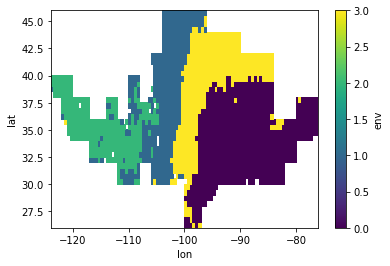

In [163]:
df_env.env[0:,0:].plot(yincrease=True, x='lon', y='lat')

In [167]:
df_envbis = df_env.to_dataframe()
df_env2 = df_envbis.dropna()
df_env2

RadiationIn     TempIn      RainIn       biomass  env
lat   lon                                                          
26.25 -99.75  2117.585693  28.994913  187.439774  12496.622070  0.0
      -99.25  2013.013794  30.333187  156.254028  12919.647461  0.0
      -98.75  2169.454590  30.638323  165.867279  12681.167969  0.0
      -98.25  2334.347412  29.742979  168.077377  11264.953125  3.0
      -97.75  2170.090820  29.391766  193.118683  11686.495117  0.0
...                   ...        ...         ...           ...  ...
45.75 -98.25  2646.646484  19.690083  300.809998  13708.612305  1.0
      -97.75  2607.606201  19.665939  308.555511  13749.832031  1.0
      -97.25  2649.182129  18.824791  320.891937  13562.751953  1.0
      -96.75  2604.484131  19.721216  327.968933  13953.210938  1.0
      -96.25  2616.099854  19.543634  352.180634  13763.797852  1.0

[1756 rows x 5 columns]

In [182]:
new = pd.merge(X, df0, how ='inner', on =['lat','lon']) 
new2=new.drop(['RadiationIn_y','TempIn_y','RainIn_y','biomass_x'], axis=1)
new2.rename(columns={'RadiationIn_x':'RadiationIn','TempIn_x':'TempIn','RainIn_x':'RainIn','biomass_y':'biomass'}, inplace=True)
new2

,lat,lon,RadiationIn,TempIn,RainIn,env,irr,cultivar,time,DaysAfterSowing,...,WU,aMaxT,aMinT,actual_ET,biomass,planting_date,potential_ET,radInt,scen,yield
0,26.25,-99.75,2117.585693,28.994913,187.439774,0,1,0,1,83.0,...,203.559006,37.221001,22.686001,305.565002,6676.200195,136.0,625.049011,1260.728027,1.0,560.299988
1,26.25,-99.75,2117.585693,28.994913,187.439774,0,1,0,2,102.0,...,198.722000,34.050999,22.011999,352.699005,8313.299805,135.0,645.609009,1135.977051,1.0,1766.699951
2,26.25,-99.75,2117.585693,28.994913,187.439774,0,1,0,3,80.0,...,175.561005,35.231998,22.812000,262.920013,6407.299805,135.0,543.096985,1165.094971,1.0,870.500000
3,26.25,-99.75,2117.585693,28.994913,187.439774,0,1,0,4,82.0,...,201.671997,33.227001,22.465000,314.989990,9631.400391,135.0,478.888000,985.395020,1.0,2093.800049
4,26.25,-99.75,2117.585693,28.994913,187.439774,0,1,0,5,79.0,...,199.815002,33.763000,21.177999,308.233002,8402.400391,136.0,469.427002,1033.291016,1.0,1414.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392032,45.75,-96.25,2616.099854,19.543634,352.180634,1,2,3,26,145.0,...,315.514008,26.320999,13.589000,576.663025,16695.199219,135.0,663.564026,1377.925049,4.0,358.600006
392033,45.75,-96.25,2616.099854,19.543634,352.180634,1,2,3,27,137.0,...,300.381989,26.882000,13.557000,625.638000,15019.700195,135.0,661.658020,1243.928955,4.0,2.800000
392034,45.75,-96.25,2616.099854,19.543634,352.180634,1,2,3,28,161.0,...,291.542999,25.540001,12.640000,625.114990,15041.099609,135.0,674.429016,1353.057007,4.0,1298.300049
392035,45.75,-96.25,2616.099854,19.543634,352.180634,1,2,3,29,153.0,...,245.585999,25.152000,11.767000,564.979980,13880.299805,136.0,697.341003,1274.892944,4.0,0.000000


In [183]:
mean=new2.groupby(['env','irr'])[['biomass']].mean()
mean

biomass
env irr              
0   1    11331.899414
    2    13783.036133
1   1    10313.811523
    2    16319.673828
2   1     8402.587891
    2    16691.642578
3   1    11869.479492
    2    15296.744141

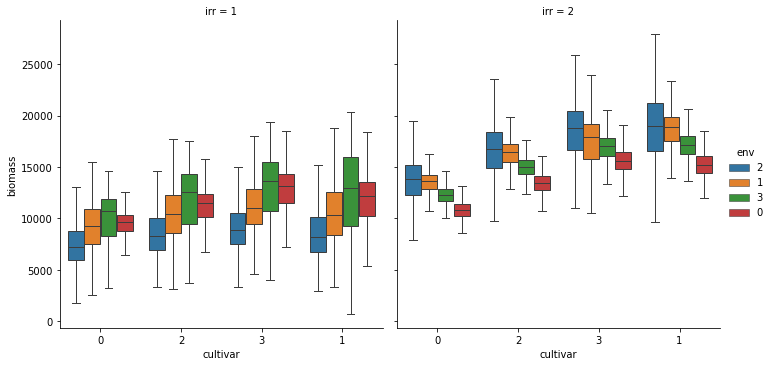

In [186]:
sns.catplot(x="cultivar", y="biomass", data=new2, hue='env', linewidth=1, kind='box', col='irr', col_wrap=2, order=[0,2,3,1],
           hue_order=[2,1,3,0], showfliers = False)

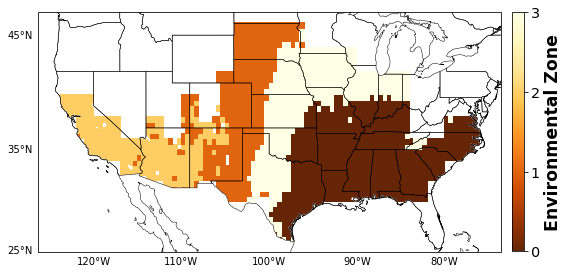

In [204]:
#Plotting single map with mean accum radiation
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Mercator(central_longitude=-95)),figsize=(10,8))

p=df_env.env.plot(x='lon', y='lat', transform=ccrs.PlateCarree(central_longitude=0),
robust=True, cmap=mpl.cm.YlOrBr_r, add_colorbar=False, zorder=1)

def area(ax, iso, clr) :
    shp = shpreader.natural_earth(resolution='10m',category='cultural',
                                  name='admin_0_countries')
    reader = shpreader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries(n.geometry, ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.01, edgecolor = "white",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['CAN', 'MEX']

gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.01, color='w', alpha=0, linestyle='-', draw_labels=True,dms=True, x_inline=False, y_inline=False)
ax.coastlines(color='black',linewidth=0.5, zorder=4)
ax.add_feature(cfeature.STATES,linewidth=0.5, zorder=3)
ax.add_feature(cfeature.OCEAN, color='white', zorder=2)
ax.add_feature(cfeature.LAKES, color='white', zorder=1.5)
gl.xlabels_top = False
gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80])
gl.ylocator = mticker.FixedLocator([25, 35, 45])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'k'}
gl.ylabel_style = {'size': 10, 'color': 'k'}

    
for value in iso3 :
    area(ax, value, "white")

area(ax, value, "white")

#Colorbar attributes
cb = plt.colorbar(p, orientation="vertical", pad=0.02, shrink=0.55, ticks=[0,1,2,3])
cb.set_label(label='Environmental Zone', size='xx-large', weight='bold')
cb.ax.tick_params(labelsize='x-large')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\seminars\20201214 UQ meeting\figs\rain.png', dpi=300, bbox_inches='tight', pad_inches=0)